Face recognitoin assignment

In [1]:
from google.colab import drive 
drive.mount("/content/gdrive") #mounting drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd "/content/gdrive/My Drive/face_data" #changing directory

/content/gdrive/My Drive/face_data


In [3]:
!pwd

/content/gdrive/My Drive/face_data


In [4]:
!pip install face_recognition #installing face recognition package

     |████████████████████████████████| 100.2MB 54kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=538cba4eaff9f3c00009dc22e3f8e82ace5c235a1a6b1e7fd784b84a3f73fce4
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [5]:
#importing important packages
import matplotlib.pyplot as plt


from skimage.feature import hog
from skimage import data,exposure

import cv2

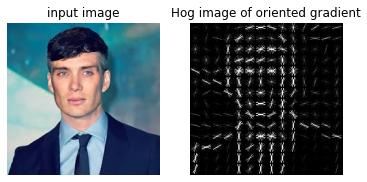

In [6]:
#Hog features
image = cv2.imread("murphy_3.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

fd, hog_image = hog(image , orientations = 8, pixels_per_cell = (16,16), cells_per_block = (1,1), visualize = True, multichannel = True)

fig, (ax1,ax2) = plt.subplots(1, 2, sharex = True, sharey = True)

ax1.axis('off')
ax1.imshow(image, cmap = plt.cm.gray)
ax1.set_title('input image')

hog_img_rescaled = exposure.rescale_intensity(hog_image, in_range = (0,10))

ax2.axis('off')
ax2.imshow(hog_img_rescaled,cmap = plt.cm.gray)
ax2.set_title('Hog image of oriented gradient')
plt.show()

In [7]:
len(fd)

1568

In [8]:
image.shape

(225, 225, 3)

In [9]:
#face recognition
import face_recognition

from matplotlib.patches import Rectangle, Circle
import numpy as np
%matplotlib inline

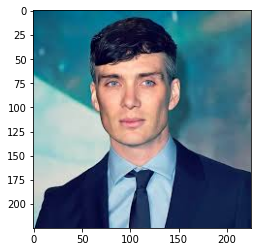

In [10]:
image = cv2.imread("murphy_3.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image)

In [11]:
face_locations = face_recognition.face_locations(image)

len(face_locations)

1

A place is located at pixel location Top: 55, Right: 137, Bottom: 130, Left: 63


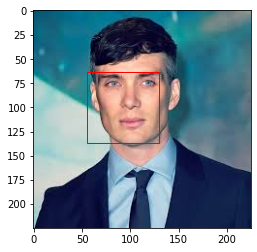

In [12]:
plt.imshow(image)
ax = plt.gca()

for face_location in face_locations:
  top, right, bottom, left = face_location
  x,y,w,h = top, right, bottom, left
  print("A place is located at pixel location Top: {}, Right: {}, Bottom: {}, Left: {}".format(x,y,w,h))

  rect = Rectangle((x,y), w-x, h-y, fill = False, color = 'red')
  ax.add_patch(rect)

plt.show()

In [36]:
image = cv2.imread("murphy_1.jpg")
murphy = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread("SRK_1.jpg")
SRK = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.imread("Scarlett_2.jpg")
Scarlett = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  

In [43]:
murphy_encoding = face_recognition.face_encodings(murphy)[0]
SRK_encoding = face_recognition.face_encodings(SRK)[0]
Scarlett_encoding = face_recognition.face_encodings(Scarlett)[0]

known_face_encoding = [ murphy_encoding, SRK_encoding, Scarlett_encoding]

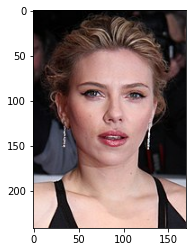

In [44]:
image = cv2.imread("scarlett_1.jpg")
unknown_face = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(unknown_face)

unknown_encoding = face_recognition.face_encodings(unknown_face)

In [46]:
from scipy.spatial import distance

for unknown_enc in unknown_encoding:

  result = []
  for known_enc in known_face_encoding:
    d = distance.euclidean(unknown_enc,known_enc)
    result.append(d)
  threshold = 0.6
  result = np.array(result) <= threshold
  name = "unknown"

  if result[0]:
    name = "Murphy"
  elif result[1]:
    name = "SRK"
  elif result[2]:
    name = "Scarlett"

  print(f"Found {name} in the image")



Found Scarlett in the image


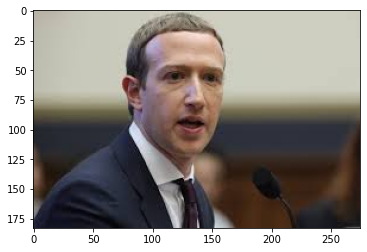

In [47]:
#plotting face features
image = cv2.imread("mark.jpg")
mark = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(mark)

landmark_lists = face_recognition.face_landmarks(mark)

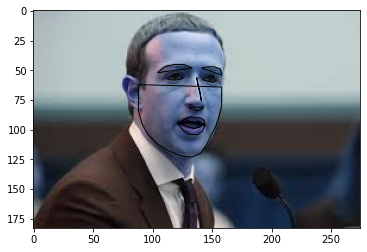

In [48]:
from matplotlib.patches import Polygon

plt.imshow(image)
ax = plt.gca()

for face_landmark in landmark_lists:

  for i in face_landmark:
    p = Polygon(face_landmark[i], facecolor = None, fill = False)
    ax.add_patch(p)

plt.show()